In [1]:
import json,os
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from utils import read_data,fitted_mu,fit_mu_model

In [2]:
def read_sampled_data(N_list, idx_list, p_list, get_path, get_path_th, model, params):
        
    results = {'problem':[],'n':[],'depth':[],'approx':[],'use threshold-based strategy':[],'approxBound':[]}

    for N in N_list:
        for idx in idx_list:
            for p in p_list:
                file_path = get_path(N,p,idx)
                if os.path.exists(file_path):
                    with open(file_path, 'r') as file:
                        data = json.load(file)
                    results['problem'].append(f'n{N}_idx{idx}')
                    results['n'].append(N)
                    results['depth'].append(p)
                    results['approx'].append(data['approx'])
                    results['use threshold-based strategy'].append('False')
                    results['approxBound'].append(model(N,p,params))
                    if data['approx'] >= 0.99:
                        break
                else:
                    break
    for N in N_list:
        for idx in idx_list:
            for p in p_list:
                file_path = get_path_th(N,p,idx)
                if os.path.exists(file_path):
                    with open(file_path, 'r') as file:
                        data = json.load(file)
                    results['problem'].append(f'n{N}_idx{idx}')
                    results['n'].append(N)
                    results['depth'].append(p)
                    results['approx'].append(data['approx'])
                    results['use threshold-based strategy'].append('True')
                    results['approxBound'].append(model(N,p,params))
                    if data['approx'] >= 0.99:
                        break
                else:
                    break
            
    df = pd.DataFrame(results)
    return df

In [3]:
p_list = [i for i in range(1,50)]
idx_list = [i for i in range(48)]

In [4]:
N_list = [i for i in range(11,18)]
def get_path(N,idx):
    return f'distribution/max_k_colorable/n{N}_k3/{idx}.npy'
df = read_data(N_list,idx_list,get_path,num_processes=4)
fitting_init = [0.1,0.1]
params_approx,mse = fit_mu_model(df[df['approxUB']<1],fitting_init)
print(params_approx,mse)
def get_path(N,p,idx):
    return f'approx_result/max_k_colorable/n{N}_k3/p{p}/{idx}.json'
def get_path_th(N,p,idx):
    return f'approx_result/th/max_k_colorable/n{N}_k3/p{p}/{idx}.json'
df_mkcs = read_sampled_data(N_list, idx_list, p_list, get_path, get_path_th, fitted_mu, params_approx)
df_mkcs['ratio'] = df_mkcs['approx']/df_mkcs['approxBound']

100%|██████████| 336/336 [00:00<00:00, 520.49it/s]


[7.6821692478885275, -11.19167185313419, 0.6666666666666666] 0.0002156298858427101


In [5]:
N_list = [i for i in range(16,29,2)]
def get_path(N,idx):
    return f'distribution/maxcut/n{N}/{idx}.npy'
df = read_data(N_list,idx_list,get_path,num_processes=4)
fitting_init = [0.1,0.1]
params_approx,mse = fit_mu_model(df[df['approxUB']<1],fitting_init)
print(params_approx,mse)
def get_path(N,p,idx):
    return f'approx_result/maxcut/n{N}/p{p}/{idx}.json'
def get_path_th(N,p,idx):
    return f'approx_result/th/maxcut/n{N}/p{p}/{idx}.json'
df_mc = read_sampled_data(N_list, idx_list, p_list, get_path, get_path_th, fitted_mu, params_approx)
df_mc['ratio'] = df_mc['approx']/df_mc['approxBound']

100%|██████████| 336/336 [00:00<00:00, 455.22it/s]


[3.6849266553278457, -8.678353828816, 0.5655290553238375] 0.0004472526706737064


In [6]:
N_list = [i for i in range(18,31,2)]
def get_path(N,idx):
    return f'distribution/max_k_vertex_cover/n{N}/{idx}.npy'
df = read_data(N_list,idx_list,get_path,num_processes=4)
fitting_init = [0.1,0.1,0.9,0.1,0.1]
params_approx,mse = fit_mu_model(df[df['approxUB']<1],fitting_init)
print(params_approx,mse)
def get_path(N,p,idx):
    return f'approx_result/max_k_vertex_cover/n{N}/p{p}/{idx}.json'
def get_path_th(N,p,idx):
    return f'approx_result/th/max_k_vertex_cover/n{N}/p{p}/{idx}.json'
df_mkvc = read_sampled_data(N_list, idx_list, p_list, get_path, get_path_th, fitted_mu, params_approx)
df_mkvc['ratio'] = df_mkvc['approx']/df_mkvc['approxBound']

100%|██████████| 336/336 [00:00<00:00, 422.60it/s]


[ 5.20735783e+01 -5.97870545e+02  8.89588225e-01  1.20330563e-01
 -6.20678634e+00] 5.054030642716131e-05


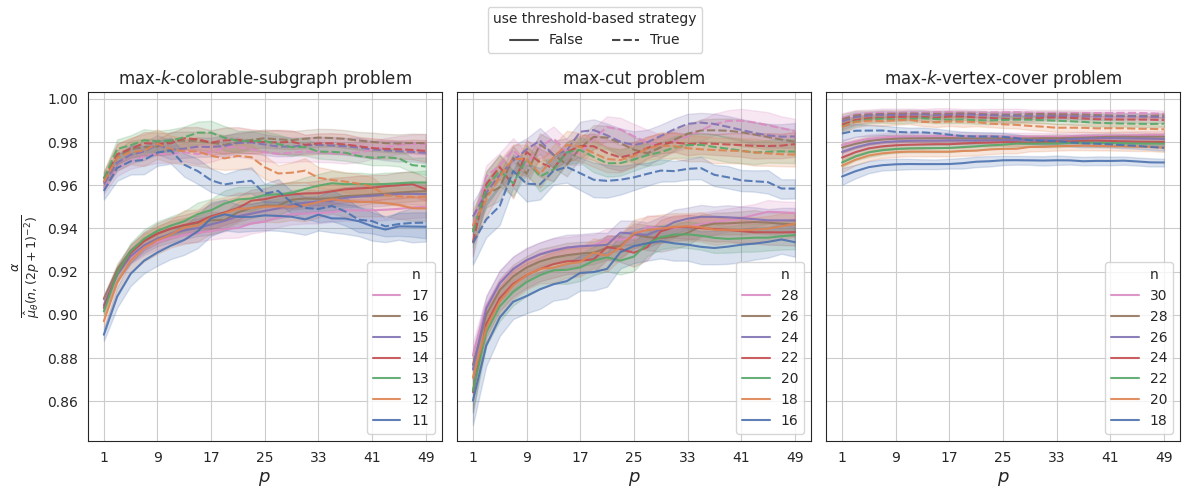

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey=True)
sns.set_style('white')

datasets = [df_mkcs,df_mc, df_mkvc]
titles = [r'max-$k$-colorable-subgraph problem', 'max-cut problem', r'max-$k$-vertex-cover problem']

for i, (data, title) in enumerate(zip(datasets, titles)):
    data = data[data['depth'] % 2 == 1]
    
    unique_N = sorted(data['n'].unique())
    colors = sns.color_palette('deep', n_colors=len(unique_N))[::-1]
        
    sns.lineplot(x='depth', y='ratio', data=data, hue='n', style='use threshold-based strategy', ax=axs[i], palette=colors, hue_order=unique_N[::-1], alpha=0.9)
    axs[i].set_xlabel(r"$p$", fontsize=13)
    axs[i].set_title(title)
    axs[i].grid()

    axs[i].set_xticks(range(1, 50, 8))
    
axs[0].set_ylabel(r"$\frac{\alpha}{\hat{\mu}_{\theta}(n, (2p+1)^{-2})}$", fontsize=13)

for ax in axs:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:-3], labels[:-3], loc='lower right')

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles[-2:], labels[-2:], loc='upper center', ncol=3, title='use threshold-based strategy')

plt.tight_layout(rect=[0, 0, 1, 0.9])

plt.savefig(f'figs/approx_ratio.pdf')
plt.show()